In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def max_filtering(N, I_temp):
    wall = np.full((I_temp.shape[0]+(N//2)*2, I_temp.shape[1]+(N//2)*2), -1)
    wall[(N//2):wall.shape[0]-(N//2), (N//2):wall.shape[1]-(N//2)] = I_temp.copy()
    temp = np.full((I_temp.shape[0]+(N//2)*2, I_temp.shape[1]+(N//2)*2), -1)
    for y in range(0,wall.shape[0]):
        for x in range(0,wall.shape[1]):
            if wall[y,x]!=-1:
                window = wall[y-(N//2):y+(N//2)+1,x-(N//2):x+(N//2)+1]
                num = np.amax(window)
                temp[y,x] = num
    A = temp[(N//2):wall.shape[0]-(N//2), (N//2):wall.shape[1]-(N//2)].copy()
    return A

def min_filtering(N, A):
    wall_min = np.full((A.shape[0]+(N//2)*2, A.shape[1]+(N//2)*2), 300)
    wall_min[(N//2):wall_min.shape[0]-(N//2), (N//2):wall_min.shape[1]-(N//2)] = A.copy()
    temp_min = np.full((A.shape[0]+(N//2)*2, A.shape[1]+(N//2)*2), 300)
    for y in range(0,wall_min.shape[0]):
        for x in range(0,wall_min.shape[1]):
            if wall_min[y,x]!=300:
                window_min = wall_min[y-(N//2):y+(N//2)+1,x-(N//2):x+(N//2)+1]
                num_min = np.amin(window_min)
                temp_min[y,x] = num_min
    B = temp_min[(N//2):wall_min.shape[0]-(N//2), (N//2):wall_min.shape[1]-(N//2)].copy()
    return B

def background_subtraction(I, B):
    O = I - B
    norm_img = cv2.normalize(O, None, 0,255, norm_type=cv2.NORM_MINMAX)
    return norm_img

def min_max_filtering(M, N, I):
    if M == 0:
        #max_filtering
        A = max_filtering(N, I)
        #min_filtering
        B = min_filtering(N, A)
        #subtraction
        normalised_img = background_subtraction(I, B)
    elif M == 1:
        #min_filtering
        A = min_filtering(N, I)
        #max_filtering
        B = max_filtering(N, A)
        #subtraction
        normalised_img = background_subtraction(I, B)
    return normalised_img

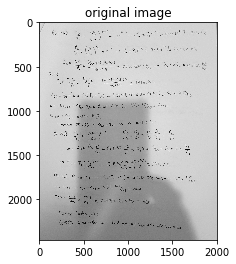

In [5]:
P = cv2.imread('Theory.jpg',0)
plt.imshow(P,cmap='gray')
plt.title("original image")
plt.show()

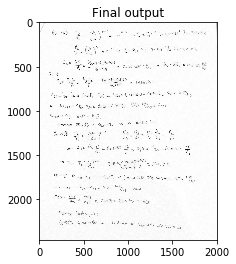

In [6]:
#We can edit the N and M values here for P and C images
O_P = min_max_filtering(M = 0, N = 20, I = P)


#Display final output
plt.imshow(O_P, cmap = 'gray')
plt.title("Final output")
plt.show()